# LENDING CLUB CASE STUDY

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Sourcing

#### Load `Data_Dictionary.xlsx`

In [156]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

pd.read_excel("Data_Dictionary.xlsx", header=0)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"
114,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.
115,NaN,NaN


#### Load -  `loan.csv`

In [157]:
loan = pd.read_csv('loan.csv', dtype={'next_pymnt_d': object})

## 2. Data Understanding

In [158]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [159]:
print(loan.shape)

(39717, 111)


In [160]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


## 3. Data Cleaning

#### Step 3.1 - Remove Nulls columns over 90%

In [161]:
#Checking Null Values in percentage across the columns
loan.isna().sum()*100/len(loan)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [162]:
loan = loan.loc[:, loan.isna().sum() < len(loan)*.9]

In [163]:
loan.shape

(39717, 55)

In [164]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Step 3.2: Remove duplicates based on ID column

In [165]:
loan['id'].duplicated().any() # No Duplicates

False

#### Step 3.3 Removing Columns

In [166]:
#Customer Behaviour Variables
loan.drop(["delinq_2yrs",
           "earliest_cr_line",
           "inq_last_6mths",
           "open_acc",
           "pub_rec",
           "revol_bal",
           "revol_util",
           "total_acc",
           "out_prncp",
           "out_prncp_inv",
           "total_pymnt",
           "total_pymnt_inv",
           "total_rec_prncp",
           "total_rec_int",
           "total_rec_late_fee", 
           "recoveries",
           "collection_recovery_fee",
           "last_pymnt_d",
           "last_pymnt_amnt",
           "last_credit_pull_d",
           "application_type"
           ],axis = 1, inplace=True)

In [167]:
loan.shape

(39717, 34)

In [168]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'mths_since_last_delinq',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [169]:
# Removing Columns - Single Value in each column
loan.drop(["pymnt_plan",
           'collections_12_mths_ex_med',
           'policy_code',
           'acc_now_delinq',
           'chargeoff_within_12_mths',
           'delinq_amnt',
           'pub_rec_bankruptcies',
           'tax_liens'
          ],axis = 1, inplace=True)

In [170]:
# Removing Columns - Columns assinged when loan is approved
loan.drop(['id',
           'member_id',
           "emp_title",
           "url",
           'desc',
           'purpose',
           'title',
           "zip_code", # Incomplete zip code
           "mths_since_last_delinq",
           "initial_list_status"
          ],axis = 1, inplace=True)

In [171]:
# Removing Columns - Similar Columns
loan.drop(["funded_amnt", 
           "funded_amnt_inv"] ,axis = 1, inplace=True)

In [172]:
loan.shape

(39717, 14)

In [173]:
# Final List of columns to work on.
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'addr_state', 'dti'],
      dtype='object')

#### Step 3.4 - Removing rows `loan_status` == `Current`

In [174]:
print(loan["loan_status"].value_counts())

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [175]:
loan = loan[loan["loan_status"] != 'Current']

In [176]:
loan.shape

(38577, 14)

#### Step 3.5 - Fixing `term` column (Removing `month`)

In [177]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [178]:
loan.term = loan.term.apply(lambda x: int(x.replace(" months", "")))

In [179]:
loan.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

#### Step 3.6 - Fixing `int_rate` column (Removing `%`)

In [180]:
loan.int_rate = loan.int_rate.apply(lambda x: float(x[:-1]))

In [181]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

#### Step 3.7 - Fixing column `emp_length` (removing `years` and `+`)  

In [182]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [183]:
loan.emp_length = loan.emp_length.astype('str')

In [184]:
loan.emp_length = loan.emp_length.apply(lambda x: x.strip(" years"))

In [185]:
loan.emp_length.unique()

array(['10+', '< 1', '3', '8', '9', '4', '5', '1', '6', '2', '7', 'nan'],
      dtype=object)

In [186]:
def clean(input):
    if "nan" in input:
        return int(-1)
    elif "+" in input:
        return int(input.replace("+", ""))
    elif "<" in input:
        return int(input.replace("< ", ""))
    else:
        return int(input)

loan.emp_length = loan.emp_length.apply(clean)

In [187]:
loan.emp_length.unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7, -1])

In [188]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [189]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [190]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Step 3.8 - Deriving `issue_month` and `issue_year` from `issue_d`

In [191]:
from datetime import datetime
loan["issued_month"] = pd.DatetimeIndex(loan.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).month

In [192]:
loan.issued_month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [193]:
loan["issued_year"] = pd.DatetimeIndex(loan.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).year

In [194]:
loan.issued_year.unique()

array([2011, 2010, 2009, 2008, 2007])

In [195]:
loan.drop(["issue_d"] ,axis = 1, inplace=True)

In [196]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'addr_state', 'dti', 'issued_month', 'issued_year'],
      dtype='object')

In [197]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,addr_state,dti,issued_month,issued_year
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,AZ,27.65,12,2011
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Charged Off,GA,1.00,12,2011
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,IL,8.72,12,2011
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,CA,20.00,12,2011
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,AZ,11.20,12,2011


## 4. Outlier Treatment

#### Step 4.1 - Treating `annual_inc`

<AxesSubplot:xlabel='annual_inc'>

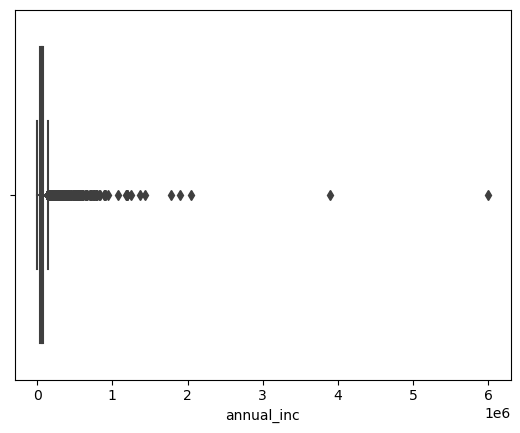

In [198]:
sns.boxplot(loan['annual_inc'])

In [199]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [200]:
annual_inc_99_per = loan['annual_inc'].quantile(0.99)
loan = loan[loan.annual_inc <= annual_inc_99_per]

<AxesSubplot:xlabel='annual_inc'>

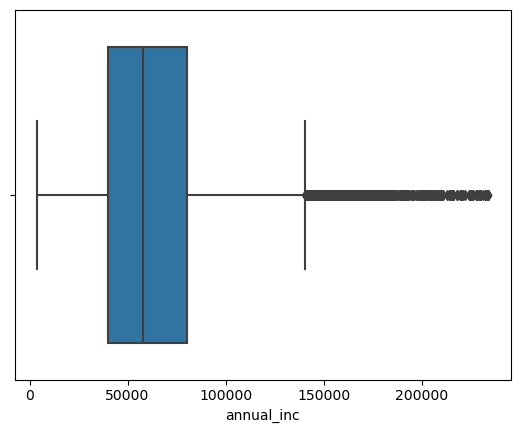

In [201]:
sns.boxplot(loan.annual_inc)

## 5. Univariant Analysis

#### Step 5.1 -  `loan_status` 

<AxesSubplot:xlabel='loan_status', ylabel='count'>

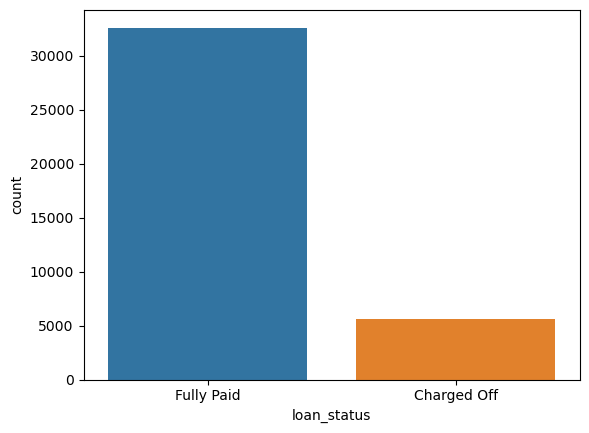

In [202]:
sns.countplot(x = 'loan_status', data = loan)

#### Step 5.2 - `term` 

<AxesSubplot:xlabel='term', ylabel='count'>

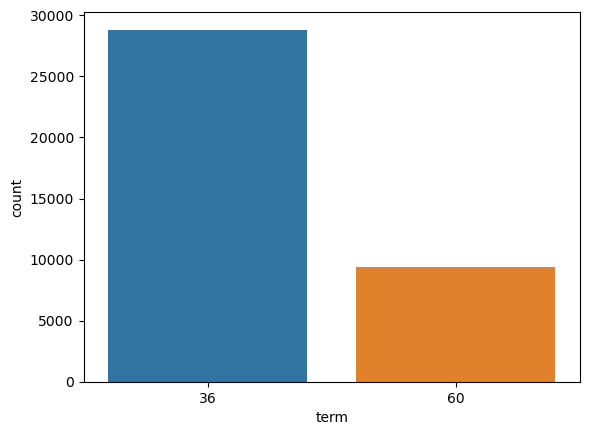

In [203]:
sns.countplot(x = 'term', data = loan)

#### Step 5.3 - `home_ownership` 

In [204]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [205]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [206]:
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

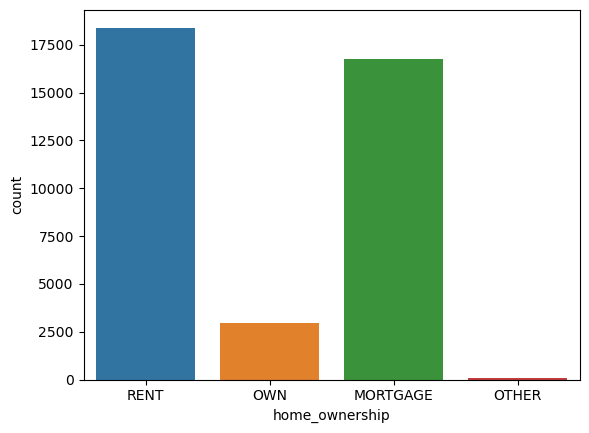

In [207]:
sns.countplot(x = 'home_ownership', data = loan)

#### Step 5.4 - `addr_state` 

[Text(0, 0, 'AZ'),
 Text(1, 0, 'GA'),
 Text(2, 0, 'IL'),
 Text(3, 0, 'CA'),
 Text(4, 0, 'NC'),
 Text(5, 0, 'TX'),
 Text(6, 0, 'VA'),
 Text(7, 0, 'MO'),
 Text(8, 0, 'CT'),
 Text(9, 0, 'UT'),
 Text(10, 0, 'FL'),
 Text(11, 0, 'NY'),
 Text(12, 0, 'PA'),
 Text(13, 0, 'MN'),
 Text(14, 0, 'NJ'),
 Text(15, 0, 'OR'),
 Text(16, 0, 'KY'),
 Text(17, 0, 'OH'),
 Text(18, 0, 'SC'),
 Text(19, 0, 'RI'),
 Text(20, 0, 'LA'),
 Text(21, 0, 'MA'),
 Text(22, 0, 'WA'),
 Text(23, 0, 'WI'),
 Text(24, 0, 'AL'),
 Text(25, 0, 'NV'),
 Text(26, 0, 'AK'),
 Text(27, 0, 'CO'),
 Text(28, 0, 'MD'),
 Text(29, 0, 'WV'),
 Text(30, 0, 'VT'),
 Text(31, 0, 'MI'),
 Text(32, 0, 'DC'),
 Text(33, 0, 'SD'),
 Text(34, 0, 'NH'),
 Text(35, 0, 'AR'),
 Text(36, 0, 'NM'),
 Text(37, 0, 'KS'),
 Text(38, 0, 'HI'),
 Text(39, 0, 'OK'),
 Text(40, 0, 'MT'),
 Text(41, 0, 'WY'),
 Text(42, 0, 'DE'),
 Text(43, 0, 'MS'),
 Text(44, 0, 'TN'),
 Text(45, 0, 'IA'),
 Text(46, 0, 'NE'),
 Text(47, 0, 'ID'),
 Text(48, 0, 'IN'),
 Text(49, 0, 'ME')]

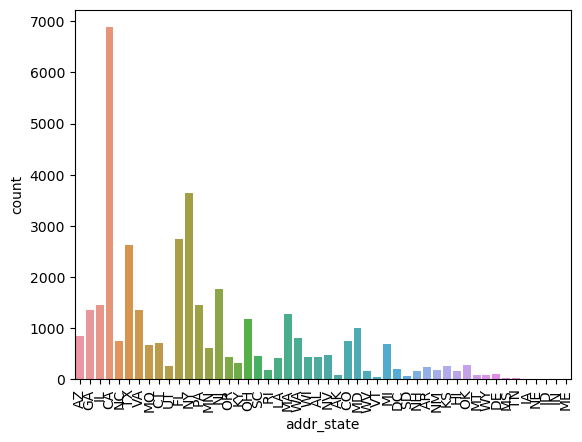

In [208]:
g = sns.countplot(x = 'addr_state', data = loan)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Step 5.5 -  `int_rate` 

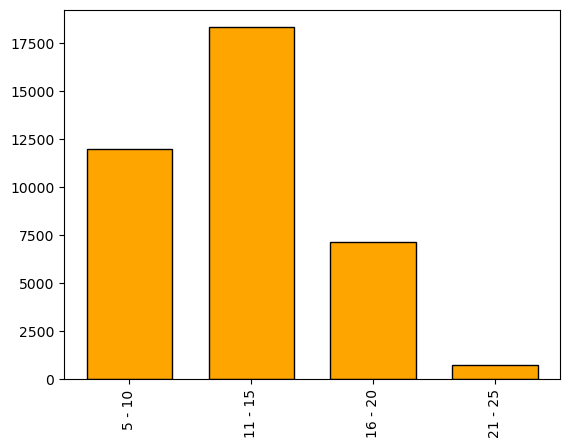

In [209]:
x = [7.5, 12.5, 17.5, 22.5]
labels = ['5 - 10', '11 - 15','16 - 20','21 - 25']
plt.hist(loan['int_rate'], bins = [5,10,15,20,25],rwidth = 0.7, color = "orange", edgecolor = 'k')
plt.xticks(x, labels, rotation ='vertical')
plt.show()

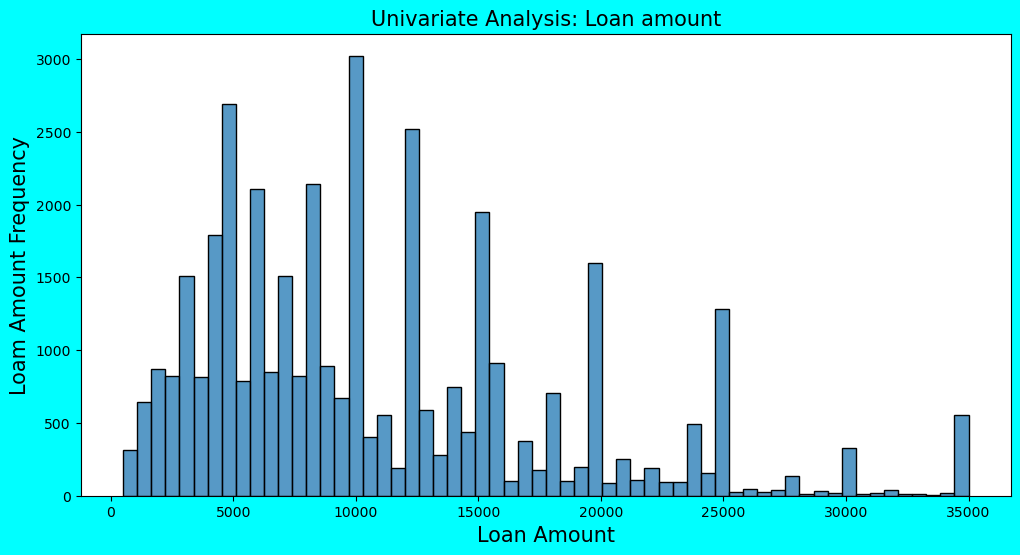

In [210]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Loan amount', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x = loan.loan_amnt)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount', fontdict=xy_fontdict)
plt.ylabel('Loam Amount Frequency', fontdict=xy_fontdict)
plt.show()

<AxesSubplot:ylabel='Density'>

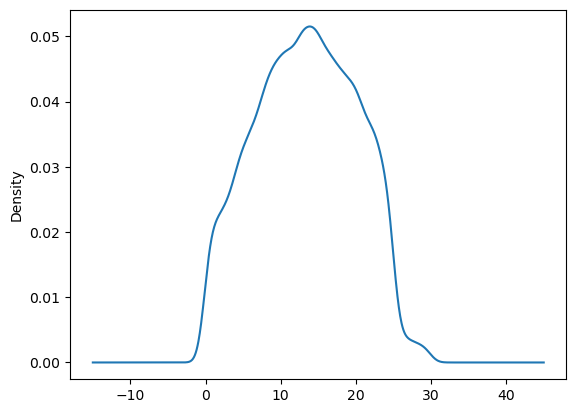

In [211]:
loan['dti'].plot(kind='kde')
#Most loans are lent to borrowers with DTI ratio in between 10 and 20.

Text(0.5, 9.444444444444438, 'Employment length (in years)')

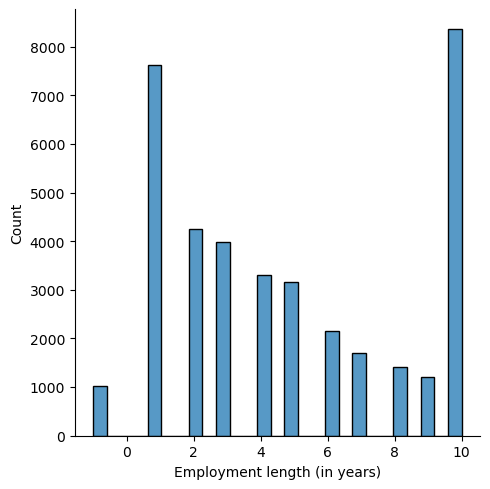

In [212]:
sns.displot(loan.emp_length)
plt.xlabel('Employment length (in years)')

#### Step 5.6 Observation from Univariant Analysis
- Majority of the loans are fully paid, only about ~5500(15%) loans are charged-off
- Majority of the loan applications opts for 36 months loan term. About ~30,000 (75%)
- Minority of the folks who has loan are actually home owners (about ~2500 home owners only)
- Majority of the loan applications are from California State
- Majority of the loan amount are from ~5K to ~15K
- Most loans are lent to borrowers with DTI ratio in between 10 and 20.
- Majority of the home owners have either high work experience of 10 + years or 1 year. 

## 6. Segmented Univariate Analysis

In [213]:
loan.groupby(["loan_status"])["loan_amnt"].agg(np.mean)

loan_status
Charged Off    12042.814291
Fully Paid     10777.220382
Name: loan_amnt, dtype: float64

In [214]:
loan.groupby(["loan_status"])["int_rate"].agg(np.mean)

loan_status
Charged Off    13.808626
Fully Paid     11.594082
Name: int_rate, dtype: float64

In [215]:
loan.groupby(["loan_status"])["dti"].agg(np.mean)

loan_status
Charged Off    14.044989
Fully Paid     13.211646
Name: dti, dtype: float64

In [216]:
loan.groupby(["loan_status"])["annual_inc"].agg(np.mean)

loan_status
Charged Off    59840.876109
Fully Paid     66250.824386
Name: annual_inc, dtype: float64

In [217]:
loan.groupby(["loan_status"])["installment"].agg(np.mean)

loan_status
Charged Off    334.277242
Fully Paid     317.483484
Name: installment, dtype: float64

In [218]:
loan.groupby(["loan_status", "grade"])["loan_amnt"].agg(np.mean)

loan_status  grade
Charged Off  A         7801.247920
             B        10852.422207
             C        11006.054396
             D        12184.172662
             E        15782.137784
             F        19059.134615
             G        18557.575758
Fully Paid   A         8625.871907
             B        10870.165732
             C        10691.705662
             D        12006.730524
             E        15446.432319
             F        17244.158879
             G        20827.105263
Name: loan_amnt, dtype: float64

In [219]:
loan.groupby(["loan_status", "home_ownership"])["loan_amnt"].agg(np.mean)

loan_status  home_ownership
Charged Off  MORTGAGE          14010.469157
             OTHER             13747.222222
             OWN               10996.306818
             RENT              10591.058782
Fully Paid   MORTGAGE          12081.579676
             OTHER              9559.567901
             OWN                9868.617870
             RENT               9719.859693
Name: loan_amnt, dtype: float64

In [220]:
loan.groupby(["loan_status", "verification_status"])["loan_amnt"].agg(np.mean)

loan_status  verification_status
Charged Off  Not Verified            8630.622066
             Source Verified        10625.562588
             Verified               16611.368110
Fully Paid   Not Verified            8314.532956
             Source Verified         9708.796410
             Verified               15211.213621
Name: loan_amnt, dtype: float64

#### Step 6.1 Observation from Segmented Univariate Analysis
- Loan amount for charged-off loans are higher than fully paid loans
- Interests rate are higher for charged off loans.
- DTI ration for charged-off loans are higher.
- Annual income for fully paid loan are higher.
- Interestingly, loan amount goes up with pooper grade.
- The loan amounts are higher for people with Mortage then people with own houses.
- The loan amounts are higer for verified individuals